# 10. Milestone Project 3 Time series forecasting in TensorFlow (BitPredict)

We are going to predict the price of Bitcoin

# Dataset

In [7]:
import pandas as pd

df = pd.read_csv("dataset.csv",
                 parse_dates= ["Date"],
                 index_col=["Date"])

In [8]:
df.head()

,Open,High,Low,Close
Date,,,,
2024-09-30,"65,973","66,072","63,061","63,431"
2024-09-29,"65,735","65,984","65,450","65,973"
2024-09-28,"65,686","66,239","65,458","65,735"
2024-09-27,"64,747","66,492","64,658","65,689"
2024-09-26,"63,155","65,811","62,671","64,748"


In [9]:
df = df.iloc[::-1]

In [10]:
df.head()

,Open,High,Low,Close
Date,,,,
2023-09-30,"26,921","27,089","26,867","27,031"
2023-10-01,"27,031","27,281","26,959","27,105"
2023-10-02,"27,105","28,565","27,061","27,969"
2023-10-03,"27,970","27,971","27,258","27,268"
2023-10-04,"27,269","27,825","27,194","27,627"


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 367 entries, 2023-09-30 to 2024-09-30
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Open    367 non-null    object
 1   High    367 non-null    object
 2   Low     367 non-null    object
 3   Close   367 non-null    object
dtypes: object(4)
memory usage: 14.3+ KB


In [12]:
df = df.replace({',': ''}, regex=True)

In [13]:
df = df.astype({'Open': 'int', 'High': 'int', 'Low': 'int', 'Close': 'int'})

In [14]:
# Save DataFrame to CSV
df.to_csv('dataset1.csv', index=True)

In [15]:
len(df)

367

In [16]:
bitcoin_prices = pd.DataFrame(df["Close"]).rename(columns={"Close": "Price"})
bitcoin_prices
                              

,Price
Date,
2023-09-30,27031
2023-10-01,27105
2023-10-02,27969
2023-10-03,27268
2023-10-04,27627
...,...
2024-09-26,64748
2024-09-27,65689
2024-09-28,65735


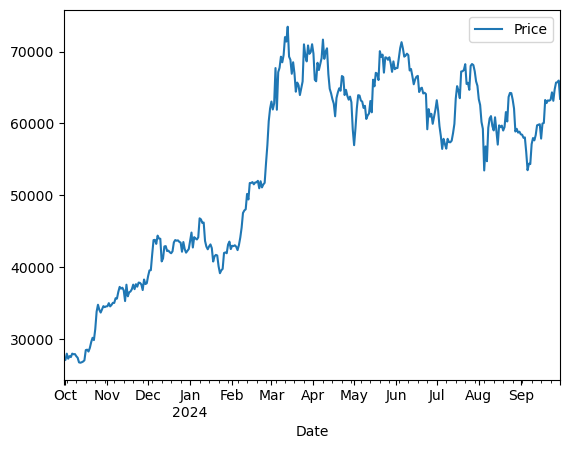

In [17]:
import matplotlib.pyplot as plt

bitcoin_prices.plot();

In [18]:
import csv
from datetime import datetime

timesteps = []
btc_price = []
with open(r"C:\Users\ziyad\Courses\DL\10_Milestone_Project 3_Time_series_forecasting_in_TensorFlow_(BitPredict)\dataset1.csv", "r") as f:
    csv_reader = csv.reader(f, delimiter= ",")
    next(csv_reader)
    for line in csv_reader:
        timesteps.append(datetime.strptime(line[0], "%Y-%m-%d"))
        btc_price.append(int(line[4]))

timesteps[:10], btc_price[:10]

([datetime.datetime(2023, 9, 30, 0, 0),
  datetime.datetime(2023, 10, 1, 0, 0),
  datetime.datetime(2023, 10, 2, 0, 0),
  datetime.datetime(2023, 10, 3, 0, 0),
  datetime.datetime(2023, 10, 4, 0, 0),
  datetime.datetime(2023, 10, 5, 0, 0),
  datetime.datetime(2023, 10, 6, 0, 0),
  datetime.datetime(2023, 10, 7, 0, 0),
  datetime.datetime(2023, 10, 8, 0, 0),
  datetime.datetime(2023, 10, 9, 0, 0)],
 [27031, 27105, 27969, 27268, 27627, 27487, 27972, 27884, 27907, 27614])

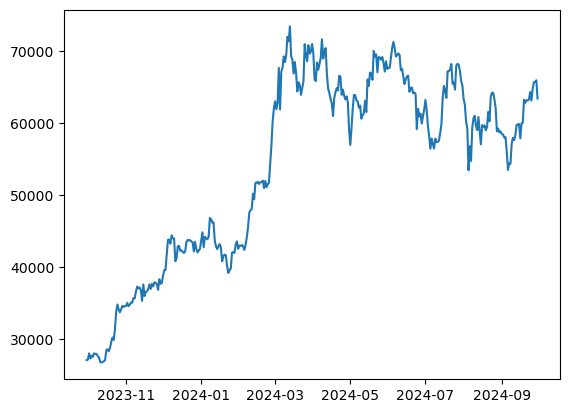

In [19]:
plt.plot(timesteps, btc_price);

In [20]:
bitcoin_prices.head()

,Price
Date,
2023-09-30,27031
2023-10-01,27105
2023-10-02,27969
2023-10-03,27268
2023-10-04,27627


In [21]:
timesteps = bitcoin_prices.index.to_numpy()
prices = bitcoin_prices["Price"].to_numpy()
timesteps[:10], prices[:10]

(array(['2023-09-30T00:00:00.000000000', '2023-10-01T00:00:00.000000000',
        '2023-10-02T00:00:00.000000000', '2023-10-03T00:00:00.000000000',
        '2023-10-04T00:00:00.000000000', '2023-10-05T00:00:00.000000000',
        '2023-10-06T00:00:00.000000000', '2023-10-07T00:00:00.000000000',
        '2023-10-08T00:00:00.000000000', '2023-10-09T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([27031, 27105, 27969, 27268, 27627, 27487, 27972, 27884, 27907,
        27614]))

In [22]:
split_size = int(0.8*len(prices))
X_train, y_train = timesteps[:split_size], prices[:split_size]
X_test, y_test = timesteps[split_size:], prices[split_size:]
len(X_train), len(X_test), len(y_train), len(y_test)

(293, 74, 293, 74)

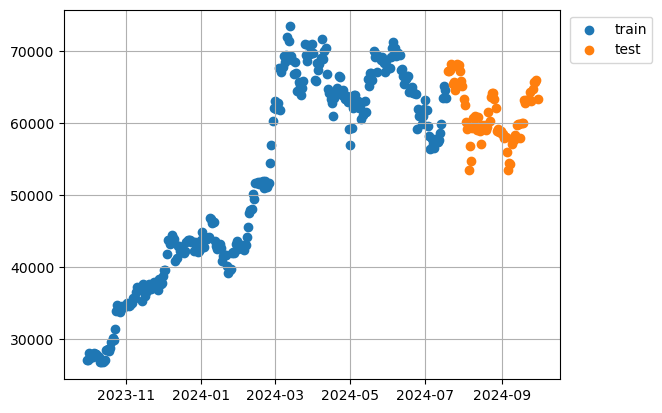

In [23]:
plt.scatter(X_train, y_train, label="train")
plt.scatter(X_test, y_test, label="test")
plt.legend(bbox_to_anchor=(1.2, 1))
plt.grid()

# Model

* horizon = number of timesteps to predict into future
* window = number of timesteps from past used to predict horizon

| Model Type                                                  | Horizon size | Window size | Extra data            |
|--------------------------------------------------------------|--------------|-------------|-----------------------|
| Naïve model (baseline)                                       | NA           | NA          | NA                    |
| Dense model                                                  | 1            | 7           | NA                    |



# Format Data

In [24]:
naive_forecast = y_test[:-1]
len(naive_forecast)

73

In [25]:
import tensorflow as tf

In [26]:
def mean_absolute_scaled_error(y_true,y_pred):
    mae = tf.reduce_mean(tf.abs(y_true-y_pred))
    mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:]-y_true[:-1]))
    return (mae/mae_naive_no_season)

In [27]:
mean_absolute_scaled_error(y_test[1:], naive_forecast).numpy()

0.9862903225806452

In [28]:
y_test.dtype

dtype('int32')

In [29]:
from tensorflow.keras import metrics
def evaluate_preds(y_true,y_pred):
    y_true = tf.cast(y_true, dtype=tf.float32)
    y_pred = tf.cast(y_pred, dtype=tf.float32)

    mae = metrics.MeanAbsoluteError()(y_true, y_pred)
    mse = metrics.MeanSquaredError()(y_true, y_pred) 
    rmse = tf.sqrt(mse)
    mape = metrics.MeanAbsolutePercentageError()(y_true, y_pred)
    mase = mean_absolute_scaled_error(y_true, y_pred)
  
    return {"mae": mae.numpy(),
            "mse": mse.numpy(),
            "rmse": rmse.numpy(),
            "mape": mape.numpy(),
            "mase": mase.numpy()}

In [30]:
naive_results = evaluate_preds(y_test[1:], naive_forecast)
naive_results

{'mae': 1223.5343,
 'mse': 2909474.8,
 'rmse': 1705.7183,
 'mape': 2.0358636,
 'mase': 0.98658866}

In [31]:
Horizon = 1 # Predict 1 day (Label)
Windows = 7 # use 7 days to predict (Data)

In [32]:
# Create function to label windowed data
def get_labelled_windows(x, horizon=Horizoon):
  return tf.squeeze(x[:, :-horizon]).numpy(), tf.squeeze(x[:, -horizon:]).numpy()

In [33]:
test_window, test_label = get_labelled_windows(tf.expand_dims(tf.range(8), axis=0))
print(test_window,"-->", test_label)

[0 1 2 3 4 5 6] --> 7


In [34]:
import numpy as np

In [35]:
# Create function to view NumPy arrays as windows 
def make_windows(x, window_size=Windows, horizon=Horizon):

    window_step = np.expand_dims(np.arange(window_size+horizon), axis=0)
    window_indexes = window_step + np.expand_dims(np.arange(len(x)-(window_size+horizon-1)), axis=0).T
    windowed_array = x[window_indexes]
    windows, labels = get_labelled_windows(windowed_array, horizon)
    return windows, labels

In [36]:
windows, labels = make_windows(prices, window_size=Windows, horizon=Horizon)
print(windows[:3])
print(labels[:3])
print( windows.shape, labels.shape)

[[27031 27105 27969 27268 27627 27487 27972]
 [27105 27969 27268 27627 27487 27972 27884]
 [27969 27268 27627 27487 27972 27884 27907]]
[27884 27907 27614]
(360, 7) (360,)


In [37]:
def make_train_test_split(windows, labels, test_split=0.2):
    split_size = int(len(windows)*(1-test_split))
    train_windows = windows[:split_size]
    test_windows = windows[split_size:]
    train_labels = labels[:split_size]
    test_labels = labels[split_size:]
    return train_windows, test_windows, train_labels, test_labels

In [38]:
train_windows, test_windows, train_labels, test_labels = make_train_test_split(windows, labels, test_split=0.2)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(288, 72, 288, 72)

In [49]:
# Create ModelCheckpoint
import os

def create_model_checkpoint(model_name, save_path="model_experiments"):
    return tf.keras.callbacks.ModelCheckpoint(
        filepath=os.path.join(save_path, model_name + ".keras"),
        monitor="val_loss",
        verbose=0,
        save_best_only=True
    )

# Make the model

In [44]:
print(train_windows.shape)
print(train_labels.shape)
print(test_windows.shape)


(288, 7)
(288,)
(72, 7)


In [58]:
import tensorflow as tf
from tensorflow.keras import layers

tf.random.set_seed(42)


model = tf.keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(Horizon, activation="linear")
    ])


model.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae", "mse"])

model.fit(train_windows,
          train_labels,
          epochs = 100,
          batch_size = 128,
          validation_data = (test_windows, test_labels),
          callbacks=[create_model_checkpoint(model_name="model")])

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - loss: 41715.4766 - mae: 41715.4766 - mse: 1858175744.0000 - val_loss: 38486.5586 - val_mae: 38486.5586 - val_mse: 1491151872.0000
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 32117.2461 - mae: 32117.2461 - mse: 1103697792.0000 - val_loss: 27261.1797 - val_mae: 27261.1797 - val_mse: 752102656.0000
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 22486.6914 - mae: 22486.6914 - mse: 544530304.0000 - val_loss: 15941.2705 - val_mae: 15941.2705 - val_mse: 262571856.0000
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 12759.9395 - mae: 12759.9395 - mse: 180865248.0000 - val_loss: 4809.4316 - val_mae: 4809.4316 - val_mse: 28631974.0000
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 3487.5977 - mae: 3487.5977 - mse: 18370940.0000 - val_loss: 5913.8628 - val_mae: 5913.8628 - val_mse: 43854224.0000
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 5389.1011 - mae: 5389.1011 - mse: 38863820.0000

In [59]:
model.evaluate(test_windows,test_labels)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1866.1731 - mae: 1866.1731 - mse: 5874518.0000 


[1812.51953125, 1812.51953125, 5304926.0]

In [60]:
model_ = tf.keras.models.load_model("model_experiments/model.keras")
model_.evaluate(test_windows,test_labels)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1866.1731 - mae: 1866.1731 - mse: 5874518.0000  


[1812.51953125, 1812.51953125, 5304926.0]

In [56]:
def make_preds(model, input_data):
    forecast = model.predict(input_data)
    return tf.squeeze(forecast)


In [61]:
model_preds = make_preds(model, test_windows)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


In [63]:
model_results = evaluate_preds(test_labels,model_preds)
model_results

{'mae': 1812.5193,
 'mse': 5304926.0,
 'rmse': 2303.2424,
 'mape': 3.023773,
 'mase': 1.444271}

In [64]:
naive_results

{'mae': 1223.5343,
 'mse': 2909474.8,
 'rmse': 1705.7183,
 'mape': 2.0358636,
 'mase': 0.98658866}

### The model is worse than naive